# AdaBoost (Adaptive Boosting)

### Serão analisados dados categóricos que descrevem cogumelos utilizados para classificá-los como comestíveis ou venenosos. Dados foram obtidos no repositório [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Mushroom). Utilizando o algoritmo AdaBoost, pretende-se construir um classficador de cogumelos baseado em um modelo ensemble de árvore de decisões.

### Bibliotecas a serem utilizadas

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate

### Importação dos dados

In [9]:
dataset = pd.read_csv('mushroom_dataset.csv', header=None)
dataset = dataset.sample(frac=1) # Randomiza a ordem dos dados
dataset.columns = ['target', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'grill-attachment', 'grill-spacing',
                   'grill-size', 'grill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                   'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
                   'spore-print-color', 'population', 'habitat'] # Nomeia as colunas

In [10]:
dataset

,target,cap-shape,cap-surface,cap-color,bruises,odor,grill-attachment,grill-spacing,grill-size,grill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7854,e,x,s,w,f,n,f,w,b,g,...,s,w,w,p,w,t,p,w,n,g
2842,e,x,y,n,t,n,f,c,b,p,...,s,g,g,p,w,o,p,n,y,d
7304,p,k,y,e,f,s,f,c,n,b,...,s,w,w,p,w,o,e,w,v,l
6553,p,f,s,n,f,s,f,c,n,b,...,k,p,p,p,w,o,e,w,v,d
2080,e,x,f,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,p,f,f,g,f,f,f,c,b,g,...,k,p,b,p,w,o,l,h,y,p
4325,p,f,y,g,f,f,f,c,b,p,...,k,n,b,p,w,o,l,h,v,p
2017,e,f,s,y,t,a,f,w,n,n,...,s,w,w,p,w,o,p,n,v,d
1714,e,f,f,w,f,n,f,w,b,p,...,f,w,w,p,w,o,e,n,a,g


### Pré-processamento dos dados

In [12]:
# Conversão dos dados String para Interger dado que o sklearn DecisionTreeClassifier só aceita valores numéricos
for label in dataset.columns:
    dataset[label] = LabelEncoder().fit(dataset[label]).transform(dataset[label])
    # Todos os dados são convertidos para valores numéricos

In [13]:
dataset

,target,cap-shape,cap-surface,cap-color,bruises,odor,grill-attachment,grill-spacing,grill-size,grill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7854,0,5,2,8,0,5,1,1,0,2,...,2,7,7,0,2,2,4,7,2,1
2842,0,5,3,4,1,5,1,0,0,7,...,2,3,3,0,2,1,4,3,5,0
7304,1,3,3,2,0,7,1,0,1,0,...,2,7,7,0,2,1,0,7,4,2
6553,1,2,2,4,0,7,1,0,1,0,...,1,6,6,0,2,1,0,7,4,0
2080,0,5,0,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,1,2,0,3,0,2,1,0,0,2,...,1,6,0,0,2,1,2,1,5,4
4325,1,2,3,3,0,2,1,0,0,7,...,1,4,0,0,2,1,2,1,4,4
2017,0,2,2,9,1,0,1,1,1,5,...,2,7,7,0,2,1,4,3,4,0
1714,0,2,0,8,0,5,1,1,0,7,...,0,7,7,0,2,1,0,3,0,1


### Algoritmo AdaBoost 

In [14]:
class AdaBoost:
    def __init__(self, dataset, T, test_dataset):
        self.dataset = dataset
        self.T = T
        self.test_dataset = test_dataset
        self.alphas = None
        self.models = None

    # Função para o treinamento dos classificadores fracos
    def fit(self):
        # Valores dos atributos
        X = self.dataset.drop('target', axis=1) # Remove a coluna 'target'
        # Valores de classe
        Y = self.dataset['target'].where(dataset['target']==1, other=-1) # Valores em que a condição é falso são substituídos pelo valor em other
        # Inicializar os pesos para cada amostra dos dados como wi = 1/N e criar uma tabela que compute esta Evaluation de pesos
        Evaluation = pd.DataFrame(Y.copy()) # Cria uma cópia de Y
        Evaluation['weights'] = 1 / len(self.dataset) # Define wi (peso de cada amostra) inicial como 1/N
        models = [] # Lista para armazenar os modelos de classificadores gerados
        alphas = [] # Lista para armazenar os pesos correspondentes aos classificadores treinados

        for t in range(self.T):
            # Treinamento de um Decision Stump (Toco de Decisão)
            # Árvore de Decisão de 1 camada será utilizada como modelo de classificador
            Tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=1) # Modelo de árvore de decisão com 1 camada
            # Construção de um classificador árvore de decisão para os dados de trinamento
            model = Tree_model.fit(X, Y, sample_weight=np.array(Evaluation['weights']))
            # Armazenamento do modelo em uma lista de modelos
            models.append(model)
            # Teste do classificador
            predictions = model.predict(X) # Predição das classes dos dados de X
            # Adicionar valores a tabela Evaluation
            Evaluation['predictions'] = predictions
            Evaluation['evaluation'] = np.where(Evaluation['predictions'] == Evaluation['target'], 1, 0) # 1 para True e 0 para False
            Evaluation['misclassified'] = np.where(Evaluation['predictions'] != Evaluation['target'], 1, 0) # 1 para True e 0 para False
          
            # Cálculo do erro
            err = sum(Evaluation['weights']*Evaluation['misclassified'])
            # Cálculo dos valores de alpha (pesos dos classificadores)
            alpha = (0.5*np.log((1 - err)/ err)) 
            alphas.append(alpha)

            # Atulização os valores dos pesos das amostras
            Evaluation['weights'] *= np.exp(-alpha*Y*Evaluation['predictions'])
            Evaluation['weights'] /= sum(Evaluation['weights'])

        self.alphas = alphas
        self.models = models

    # Função para teste do modelo de classificador AdaBoost treinado (Conjunto de classificadores fracos)
    def predict(self):
        # Geração de dados de teste (Apenas um rearranjo dos dados treinamento)
        X_test = self.test_dataset.drop(['target'],axis=1).reindex(range(len(self.test_dataset)))
        Y_test = self.test_dataset['target'].reindex(range(len(self.test_dataset))).where(self.dataset['target']==1,-1)

        accuracy = None
        predictions = [] # Lista para aramazenamento de valores de predição

        for alpha,model in zip(self.alphas,self.models):
            # Predição das classes dos dados de teste
            prediction = alpha*model.predict(X_test)
            predictions.append(prediction)
        # Para gerar lista de valores de precisão para plotar precisão em função do número de classificadores utilizados
        accuracy = (np.sum(np.sign(np.sum(np.array(predictions),axis=0)) == Y_test.values)/len(predictions[0]))
        return accuracy

### Main()

With a number of  400 base models we receive an accuracy of  100.0 %


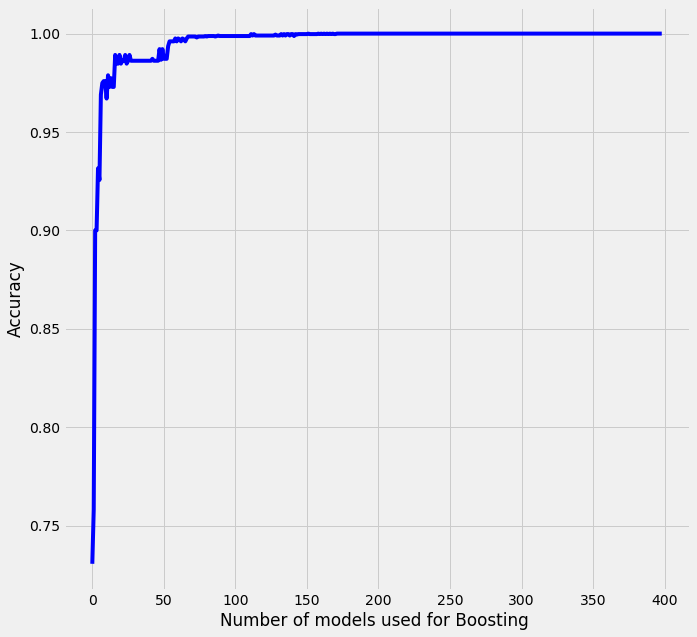

In [15]:
number_of_base_learners = 400  # Número de classificadores fracos utilizados
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
accuracy = [] # Lista para armazenar precisão de acordo com o número de classificadores utilizados
# Aplicação do algoritmo para modelos com diferentes números de classificadores
for i in range(1,number_of_base_learners):
    model = AdaBoost(dataset,i,dataset)
    model.fit()
    accuracy.append(model.predict())
ax0.plot(range(len(accuracy)),accuracy,'-b')
ax0.set_xlabel('Number of models used for Boosting ')
ax0.set_ylabel('Accuracy')
print('With a number of ',number_of_base_learners,'base models we receive an accuracy of ',accuracy[-1]*100,'%')             
plt.show()